#### <center> UNIVERSIDADE FEDERAL DO PARANÁ </center>

#### <center> MÉTODOS NUMÉRICOS EM ENGENHARIA </center>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <center> HESAU HUGO CAVALCANTI LEITE </center>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <center> PROJETO </center>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <br></br>
#### <center> CURITIBA – PR </center>

#### <center>2021  </center>

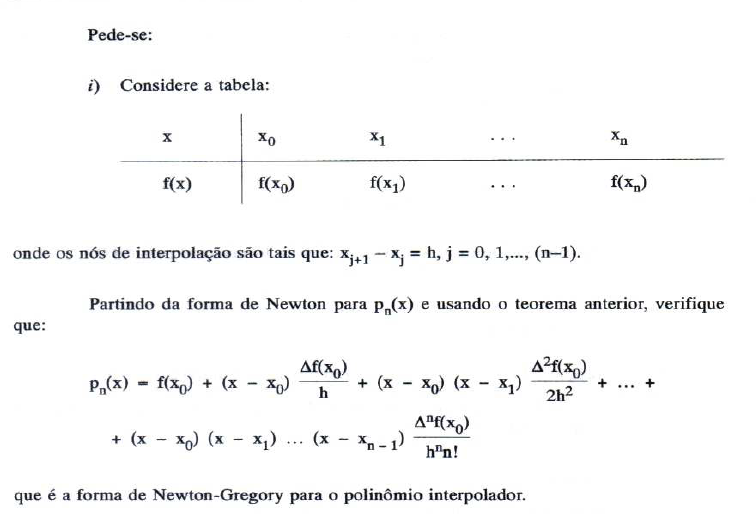

$
\text{Partindo da forma do polinômino de Newton}
\\
\Large{
\mathit{P_n(x) = } \ \mathit{ f(x_0)}
\ \mathit{ + } \ 
\frac{\mathit{f(x_1) - f(x_0)}}{x_1-x_0} \mathit{(x-x_0)}
\ \mathit{ + } \\ 
\frac{
\frac{\mathit{f(x_2) - f(x_1)}}{x_2 - x_1} 
\ \mathit{ - } \ 
\frac{\mathit{f(x_1) - f(x_0)}}{x_1 - x_0} 
}{\mathit{(x_2-x_0)}}\mathit{(x-x_0)(x-x_1)}
\ \mathit{ +...+ } \\
\frac{
\mathit{f[x_1,x_2,...,x_n] \ - \ f[x_0,x_2,...,x_{n-1}]}
}{\mathit{(x_n-x_0)}}\mathit{(x-x_0)(x-x_1)...(x-x_{n-1})}
}
\\
\text{Sabendo que os intervalos são igualmente espaçados temos que }
\\
\Large{
\mathit{x_{i+1} - x_i = h}
}
\\
\text{Substituindo temos }
\\
\Large{
\mathit{P_n(x) = } \ \mathit{ f(x_0)}
\ \mathit{ + } \ 
\frac{\mathit{f(x_1) - f(x_0)}}{h} \mathit{(x-x_0)}
\ \mathit{ + } \\ 
\frac{
\frac{\mathit{f(x_2) - f(x_1)}}{h} 
\ \mathit{ - } \ 
\frac{\mathit{f(x_1) - f(x_0)}}{h} 
}{\mathit{(2h)}}\mathit{(x-x_0)(x-x_1)}
\ \mathit{ +...+ } \\ 
\frac{
\mathit{f[x_1,x_2,...,x_n] \ - \ f[x_0,x_2,...,x_{n-1}]}
}{\mathit{(n!h^n)}}\mathit{(x-x_0)(x-x_1)...(x-x_{n-1})}
}
\\
\text{Modificando a notação temos que }
\\
\Large{
\mathit{P_n(x) = } \ \mathit{ f(x_0)}
\ \mathit{ + } \ 
\frac{\mathit{\Delta f(x_0)}}{h} \mathit{(x-x_0)}
\ \mathit{ + } \\ 
\frac{
\Delta^2 f(x_0)
}{\mathit{(2h^2)}}\mathit{(x-x_0)(x-x_1)}
\ \mathit{ +...+ } \\ 
\frac{
\mathit{\Delta^n f(x_0)}
}{\mathit{(n!h^n)}}\mathit{(x-x_0)(x-x_1)...(x-x_{n-1})}
}
$

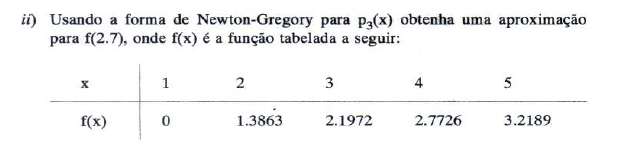

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [2]:
def calcula_u(u, n):
    produtorio = u
    for i in range(1, n):
        produtorio = produtorio * (u - i)
    return produtorio

def fatorial(n):
    f = 1
    for i in range(2, n + 1):
        f *= i
    return f

def diferencas_ordinarias(y,n):
    
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = y[j + 1][i - 1] - y[j][i - 1]
        
    #for i in range(n):
        #print(x[i], end = "\t")
        #for j in range(n - i):
            #print(y[i][j], end = "\t")
        #print("")
        
    return y
    
def GregoryNewton(x,y,n,valor):
    y = diferencas_ordinarias(y,n)
    soma = y[0][0]
    u = (valor - x[0]) / (x[1] - x[0])
    for i in range(1,n):
        soma = soma + (y[0][i] / fatorial(i)) * calcula_u(u, i)
    return soma

In [3]:
n = 4;
x = [1,2,3,4]
y = [[0 for i in range(n)]for j in range(n)]

y[0][0] =0
y[1][0] =1.3863
y[2][0] =2.1972
y[3][0] =2.7726 

valor = 2.7
print(" Resultado = ", GregoryNewton(x,y,n,valor))

 Resultado =  1.9941229500000004


$
\text{Resultado encontrado com Gregory Newton para} \  \mathit{P_3 f(2,7)}\ \text{foi de 1,9941229500000004}
$

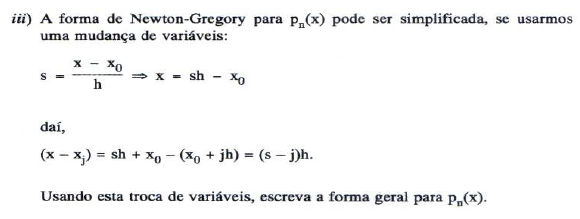

$
\text{Substituindo a versão geral para Newton Gregory será}
\\
\large{
\mathit{P_n f(x) = f(x_0) + 
\sum\limits_{i=1}^{n}
\left( \frac{\Delta^{i}f(x_0)}{i!} \prod\limits_{j=0}^{i-1}(s-j) \right)}
}
$

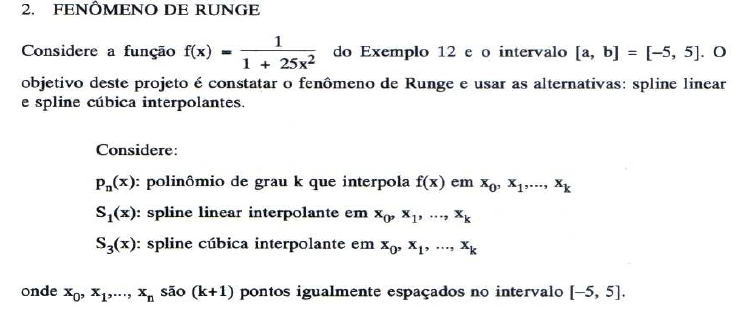

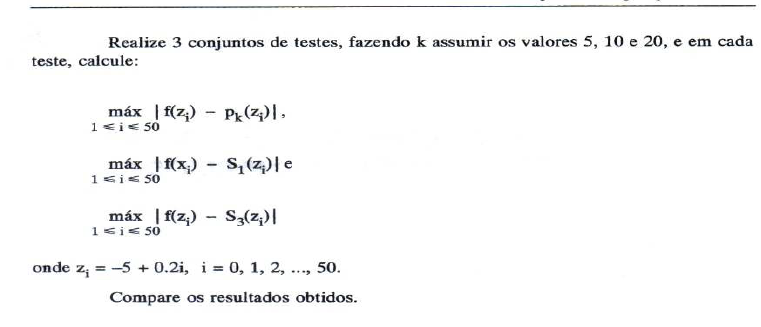

In [4]:
def fz(z):
    return 1/(1+25*z**2)

In [5]:
def splineLinear(xx,yy,x,n):
    s  = 0
    for i in range(n-1):
        if xx[i]<=x< xx[i+1]:
            s = yy[i]*((xx[i+1]-x)/(xx[i+1]-xx[i])) + yy[i+1]*((x-xx[i])/(xx[i+1]-xx[i]))
            break
    return s

In [6]:
n=6
x = np.linspace(-5, 5, num=n, endpoint=True)
y = 1/(1+25*x**2)
f2 = interp1d(x, y, kind='cubic')
yy = [[0 for i in range(n)]for j in range(n)]

for i in range(n):
    yy[i][0]=1/(1+25*x[i]**2)


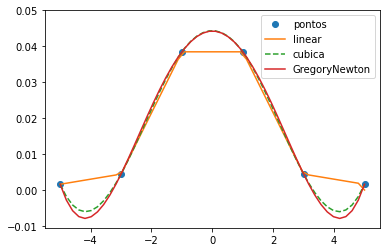

In [7]:
xx = np.linspace(-5, 5, num=50, endpoint=True)
y_spline_linear = [splineLinear(x,y,_x,n) for _x in xx]
plt.plot(x, y, 'o', xx, y_spline_linear, '-', xx, f2(xx), '--',xx,GregoryNewton(x,yy,n,xx),'-')
plt.yticks([x/100 for x in range(-1,6)])
plt.legend(['pontos', 'linear', 'cubica','GregoryNewton'], loc='best')
plt.show()

In [8]:
max_linear = -9999999
max_cubica = -9999999
max_GN = -9999999
max_zi_linear = 0
max_zi_cubica = 0
max_zi_GN = 0

for i in range(1,51):
    zi= -5+0.2*i
    lineardiff = abs(fz(zi)- splineLinear(x,y,zi,n))
    cubicadiff = abs(fz(zi)-f2(zi))
    GNdiff = abs(fz(zi)-GregoryNewton(x,yy,n,zi))
    #print('zi:',round(zi,6),'linear:',f(zi),'cúbica:',f2(zi),'linear dif:',lineardiff)
    if max_linear < lineardiff:
        max_linear = lineardiff
        max_zi_linear = zi
        
    if max_cubica < cubicadiff:
        max_cubica = cubicadiff
        max_zi_cubica = zi
        
    if max_GN < GNdiff:
        max_GN = GNdiff
        max_zi_GN = zi                 

print('LINEAR: max zi = ',max_zi_linear,'max diff = ',max_linear)
print('CÚBICA: max zi = ',max_zi_cubica,'max diff = ',max_cubica)
print('GREGORYNEWTON: max zi = ',max_zi_GN,'max diff = ',max_GN)                 
    

LINEAR: max zi =  0.0 max diff =  0.9615384615384616
CÚBICA: max zi =  0.0 max diff =  0.9556527119576683
GREGORYNEWTON: max zi =  0.0 max diff =  0.9557546591213079


In [9]:
n=11
x = np.linspace(-5, 5, num=n, endpoint=True)
y = 1/(1+25*x**2)
f2 = interp1d(x, y, kind='cubic')
yy = [[0 for i in range(n)]for j in range(n)]
for i in range(n):
    yy[i][0]=1/(1+25*x[i]**2)

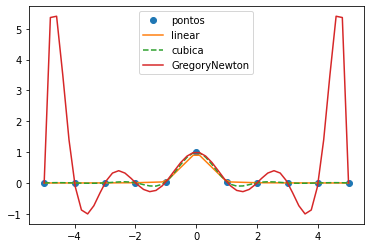

In [10]:
xx = np.linspace(-5, 5, num=50, endpoint=True)
y_spline_linear = [splineLinear(x,y,_x,n) for _x in xx]
plt.plot(x, y, 'o', xx, y_spline_linear, '-', xx, f2(xx), '--',xx,GregoryNewton(x,yy,n,xx),'-')
plt.legend(['pontos', 'linear', 'cubica','GregoryNewton'], loc='best')
plt.show()

In [11]:
max_linear = -9999999
max_cubica = -9999999
max_GN = -9999999
max_zi_linear = 0
max_zi_cubica = 0
max_zi_GN = 0

for i in range(1,51):
    zi= -5+0.2*i
    lineardiff = abs(fz(zi)- splineLinear(x,y,zi,n))
    cubicadiff = abs(fz(zi)-f2(zi))
    GNdiff = abs(fz(zi)-GregoryNewton(x,yy,n,zi))
    #print('zi:',round(zi,6),'linear:',f(zi),'cúbica:',f2(zi),'linear dif:',lineardiff)
    if max_linear < lineardiff:
        max_linear = lineardiff
        max_zi_linear = zi
        
    if max_cubica < cubicadiff:
        max_cubica = cubicadiff
        max_zi_cubica = zi
        
    if max_GN < GNdiff:
        max_GN = GNdiff
        max_zi_GN = zi                 

print('LINEAR: max zi = ',max_zi_linear,'max diff = ',max_linear)
print('CÚBICA: max zi = ',max_zi_cubica,'max diff = ',max_cubica)
print('GREGORYNEWTON: max zi = ',max_zi_GN,'max diff = ',max_GN)    

LINEAR: max zi =  -0.39999999999999947 max diff =  0.41538461538461546
CÚBICA: max zi =  -0.39999999999999947 max diff =  0.5373013829127719
GREGORYNEWTON: max zi =  4.600000000000001 max diff =  5.45356245721485


In [12]:
n = 21
x = np.linspace(-5, 5, num=n, endpoint=True)
y = 1/(1+25*x**2)
f2 = interp1d(x, y, kind='cubic')
yy = [[0 for i in range(n)]for j in range(n)]

for i in range(n):
    yy[i][0]=1/(1+25*x[i]**2)

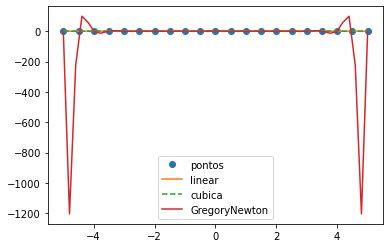

In [13]:
xx = np.linspace(-5, 5, num=50, endpoint=True)
y_spline_linear = [splineLinear(x,y,_x,n) for _x in xx]
plt.plot(x, y, 'o', xx, y_spline_linear, '-', xx, f2(xx), '--',xx,GregoryNewton(x,yy,n,xx),'-')
plt.legend(['pontos', 'linear', 'cubica','GregoryNewton'], loc='best')
plt.show()

In [14]:
max_linear = -9999999
max_cubica = -9999999
max_GN = -9999999
max_zi_linear = 0
max_zi_cubica = 0
max_zi_GN = 0

for i in range(1,51):
    zi= -5+0.2*i
    lineardiff = abs(fz(zi)- splineLinear(x,y,zi,n))
    cubicadiff = abs(fz(zi)-f2(zi))
    GNdiff = abs(fz(zi)-GregoryNewton(x,yy,n,zi))
    #print('zi:',round(zi,6),'linear:',f(zi),'cúbica:',f2(zi),'linear dif:',lineardiff)
    if max_linear < lineardiff:
        max_linear = lineardiff
        max_zi_linear = zi
        
    if max_cubica < cubicadiff:
        max_cubica = cubicadiff
        max_zi_cubica = zi
        
    if max_GN < GNdiff:
        max_GN = GNdiff
        max_zi_GN = zi                 

print('LINEAR: max zi = ',max_zi_linear,'max diff = ',max_linear)
print('CÚBICA: max zi = ',max_zi_cubica,'max diff = ',max_cubica)
print('GREGORYNEWTON: max zi = ',max_zi_GN,'max diff = ',max_GN)    

LINEAR: max zi =  0.20000000000000018 max diff =  0.15517241379310354
CÚBICA: max zi =  0.20000000000000018 max diff =  0.2684057965151454
GREGORYNEWTON: max zi =  4.800000000000001 max diff =  1223.0841056494894


$
\text{Em cinco pontos o método de spline linear gerou melhor }
\\
\text{resultado já em 10 e 20 pontos o método de spline}
\\
\text{cúbica gerou melhores resultados se comparado com }
\\
\text{Linear e Gregory Newton. Sabendo que o erro de }
\\
\text{interpolação é dado por}
\\
\large{
\mathit{f(x) - p_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \omega_n(x)}
}
\\
\text{onde } \mathit{w_n(x) = (x-x_0) ... (x-x_n)}
\text{. A medida que } \mathit{n} 
\\
\text{ (grau do polinômio interpolador) aumenta, o fator } 
\mathit{(n+1)}
\\
\text{no denominador aumenta, o que é favorável a reducão do erro.}
\\
\text{Porém também aumenta o número de termos em } \mathit{w_n(x)}
\\
\text{. Se }
\mathit{x}
\text{ está perto de um dos extremos do intervalo a maior parte dos termos }
\mathit{(x-x_j)}
\\
\text{ fornece um valor grande}
\\
\text{Concluí-se que ao aumetar o grau do polinônimo o erro também pode }
\\
\text{acabar crescendo, como é mostrado nos testes acima.}
\\
$

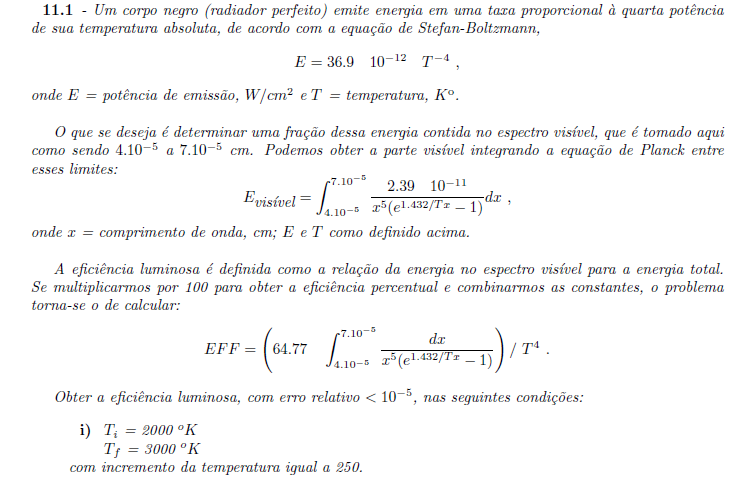

In [15]:
def funcaoEficienciaLuminosa(x,t):
    return 1/((x**5)*(np.exp(1.432/(t*x))-1))

In [16]:
def criaIntervalos(a,b,m,t):
    x = []
    y= []
    _h = (b-a)/m
    x.append(a)
    y.append(funcaoEficienciaLuminosa(a,t))
    for i in range(1,m):
        a += _h
        x.append(a)
        y.append(funcaoEficienciaLuminosa(a,t))
    x.append(b)
    y.append(funcaoEficienciaLuminosa(b,t))
    return x,y,_h

In [17]:
def trapezioRepitida(x,a,b,m,t):
    h = (b-a)/m
    s = 0
    for i in range(1,m):
        s += funcaoEficienciaLuminosa(x[i],t)
        #print("i = ",i,"fx=",funcaoEficienciaLuminosa(x[i],t))
    v = (h/2)*(funcaoEficienciaLuminosa(x[0],t) + 2*s + funcaoEficienciaLuminosa(x[m],t))
    #print("i=0",funcaoEficienciaLuminosa(x[0],t))
    #print("i=m",funcaoEficienciaLuminosa(x[m],t))
    #print("m = ",(m),"m =",m ,"x=",x,"h=",h)
    return v

In [18]:
def calculaSubintervalosTrapezio(a,b,t):
    n = 1
    x,y,h = criaIntervalos(a,b,n,t)
    anterior = (64.77 * trapezioRepitida(x,a,b,n,t))/t**4 
    n += 1
    
    while True:
        x,y,h = criaIntervalos(a,b,n,t)
        atual = (64.77 * trapezioRepitida(x,a,b,n,t))/t**4 
        erro = abs(atual-anterior)/abs(atual)
        if erro<(10**-5):
            print("erro",erro,"<",10**-5,"n=",n)
            return n
        else:
            n+=1
            anterior = atual

t 2000
erro 9.646135501774478e-06 < 1e-05 n= 50
h:  6.000000000000001e-07
n:  50
eficiencia luminosa:  0.8059954590699118


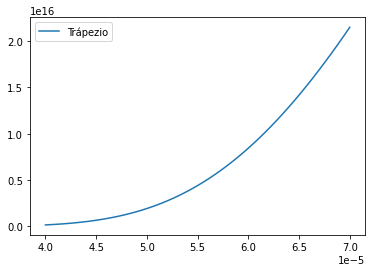

t 2250
erro 9.691956466901282e-06 < 1e-05 n= 43
h:  6.976744186046513e-07
n:  43
eficiencia luminosa:  1.8291532581899537


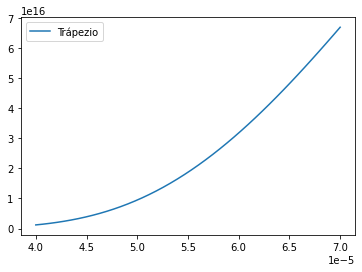

t 2500
erro 9.247897134471034e-06 < 1e-05 n= 37
h:  8.108108108108109e-07
n:  37
eficiencia luminosa:  3.426703428755246


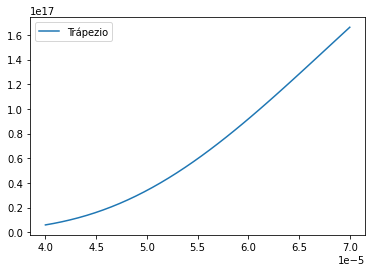

t 2750
erro 9.315450958150293e-06 < 1e-05 n= 30
h:  1.0000000000000002e-06
n:  30
eficiencia luminosa:  5.595900731438512


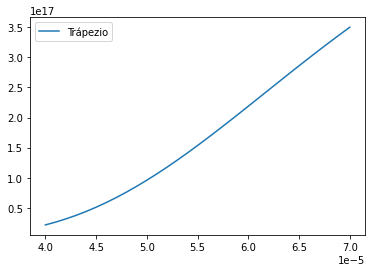

t 3000
erro 9.906701368350082e-06 < 1e-05 n= 21
h:  1.4285714285714288e-06
n:  21
eficiencia luminosa:  8.256123492549378


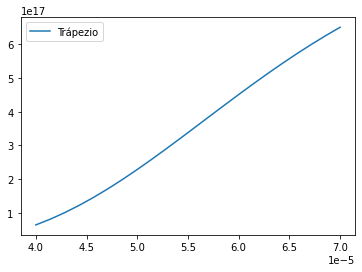

In [19]:
a= 4*10**-5
b= 7*10**-5
t= 2000
while t <=3000:
    print('t',t)
    n = calculaSubintervalosTrapezio(a,b,t)
    x,y,h = criaIntervalos(a,b,n,t)
    tresult = trapezioRepitida(x,a,b,n,t)
    treesult = (64.77 * tresult)/t**4    
    print("h: ",h)
    print("n: ",n)
    print('eficiencia luminosa: ', treesult)
    xx = np.linspace(a,b)
    yy = 1/((xx**5)*(np.exp(1.432/(t*xx))-1))
    plt.plot(x,y,'-',label='Trápezio')
    plt.legend()
    plt.show()
    t +=250

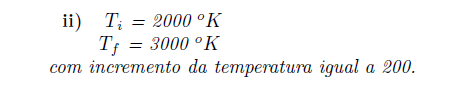

t 2000
erro 9.646135501774478e-06 < 1e-05 n= 50
h:  6.000000000000001e-07
n:  50
eficiencia luminosa:  0.8059954590699118


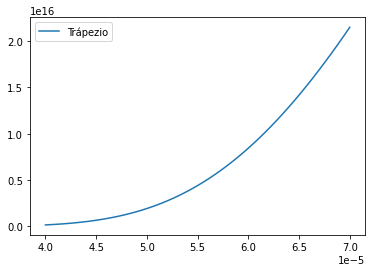

t 2200
erro 9.92052847765522e-06 < 1e-05 n= 44
h:  6.818181818181819e-07
n:  44
eficiencia luminosa:  1.5800982654990183


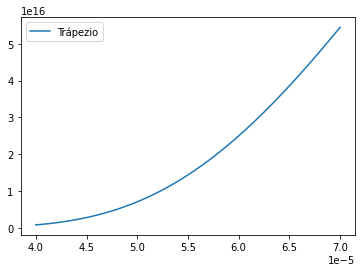

t 2400
erro 9.731043182269127e-06 < 1e-05 n= 39
h:  7.692307692307694e-07
n:  39
eficiencia luminosa:  2.716940503592501


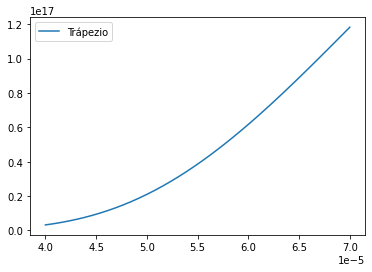

t 2600
erro 9.503013399233758e-06 < 1e-05 n= 34
h:  8.823529411764707e-07
n:  34
eficiencia luminosa:  4.22884814161224


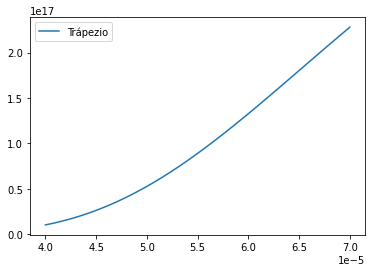

t 2800
erro 9.832618605396776e-06 < 1e-05 n= 28
h:  1.0714285714285716e-06
n:  28
eficiencia luminosa:  6.092328952819043


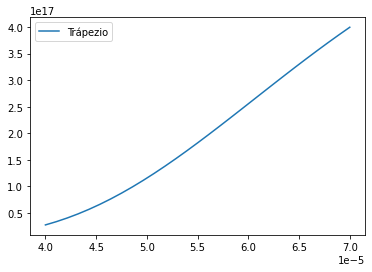

t 3000
erro 9.906701368350082e-06 < 1e-05 n= 21
h:  1.4285714285714288e-06
n:  21
eficiencia luminosa:  8.256123492549378


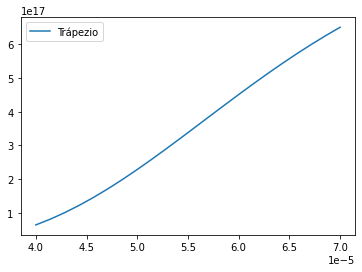

In [20]:
a= 4*10**-5
b= 7*10**-5
t= 2000
while t <=3000:
    print('t',t)
    n = calculaSubintervalosTrapezio(a,b,t)
    x,y,h = criaIntervalos(a,b,n,t)
    tresult = trapezioRepitida(x,a,b,n,t)
    treesult = (64.77 * tresult)/t**4    
    print("h: ",h)
    print("n: ",n)
    print('eficiencia luminosa: ', treesult)
    xx = np.linspace(a,b)
    yy = 1/((xx**5)*(np.exp(1.432/(t*xx))-1))
    plt.plot(x,y,'-',label='Trápezio')
    plt.legend()
    plt.show()
    t +=200

In [21]:
def criaIntervalosUmTercoSimpson(a,b,m,t):
    
    x = []
    y= []
    c= []
    #print("*",b,a,m)
    _h = (b-a)/m
    x.append(a)
    y.append(funcaoEficienciaLuminosa(a,t))
    c.append(1)
    
    for i in range(1,m):
        a += _h
        x.append(a)
        y.append(funcaoEficienciaLuminosa(a,t))
        
        if i % 2 == 0:
            c.append(2)
        else:
            c.append(4)
        
    x.append(b)
    y.append(funcaoEficienciaLuminosa(b,t))
    c.append(1)
    return x,y,c,_h

In [22]:
def simpsonRepetida(x,c,y,a,b,m):
    
    h = (b-a)/m
    s = 0
    
    for i in range(len(x)):
        s += c[i]*y[i]
        #print('x[i]',x[i],'c[i] = ',c[i],'y[i] = ', y[i])

    v = (h/3)*s
    return v

In [23]:
def calculaSubintervalosUmTercoSimpson(a,b,t):
    n = 2
    x,y,c,h = criaIntervalosUmTercoSimpson(a,b,n,t)
    anterior = (64.77 * simpsonRepetida(x,c,y,a,b,n))/t**4 
    n += 2
    
    while True:
        x,y,c,h = criaIntervalosUmTercoSimpson(a,b,n,t)
        atual = (64.77 * simpsonRepetida(x,c,y,a,b,n))/t**4 
        erro = abs(atual-anterior)/abs(atual)
        if erro<(10**-5):
            print("erro",erro,"<",10**-5,"n=",n)
            return n
        else:
            n+=2
            anterior = atual

t 2000
erro 6.765016653300785e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 0.805801855446547


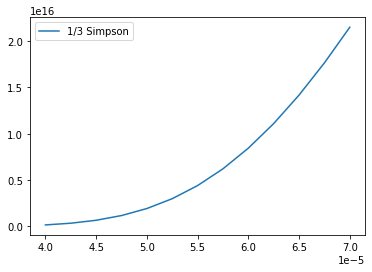

t 2250
erro 6.224300969453343e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 1.828774846624348


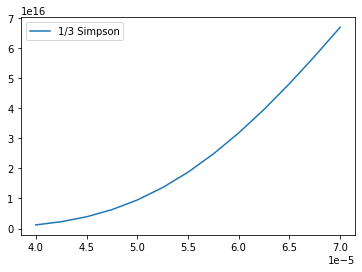

t 2500
erro 4.436987416991674e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 3.4261268288459648


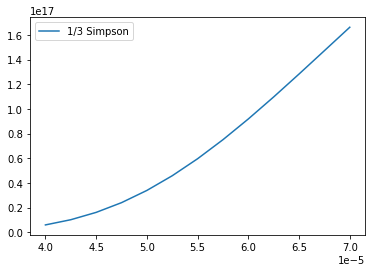

t 2750
erro 6.654792843811641e-06 < 1e-05 n= 10
h: 3.0000000000000005e-06
n:  10
Resultado: 5.595132178402565


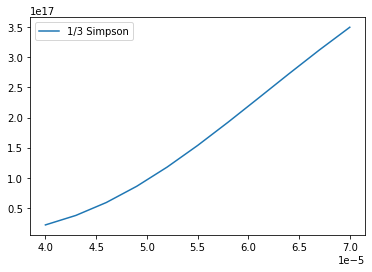

t 3000
erro 4.257799748832231e-06 < 1e-05 n= 8
h: 3.7500000000000005e-06
n:  8
Resultado: 8.255307765300651


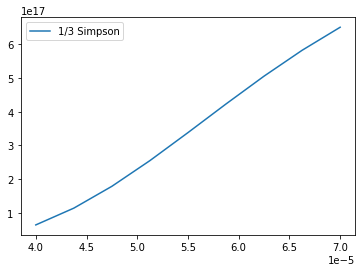

In [24]:
a= 4*10**-5
b= 7*10**-5
t= 2000

while t <=3000:
    print('t',t)
    
    n = calculaSubintervalosUmTercoSimpson(a,b,t)
    x,y,c,h = criaIntervalosUmTercoSimpson(a,b,n,t)
    Sresult = simpsonRepetida(x,c,y,a,b,n)
    Sresult = (64.77 * Sresult)/t**4   
    print('h:',h)
    print('n: ',n)
    print('Resultado:',Sresult)
    plt.plot(x,y,'-',label='1/3 Simpson')
    plt.legend()
    plt.show()
    t +=250

t 2000
erro 6.765016653300785e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 0.805801855446547


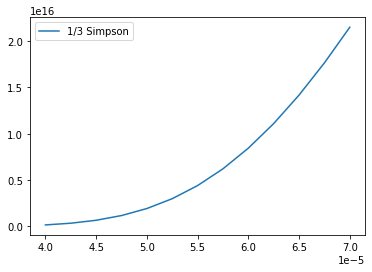

t 2200
erro 6.480572669135137e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 1.57975566772696


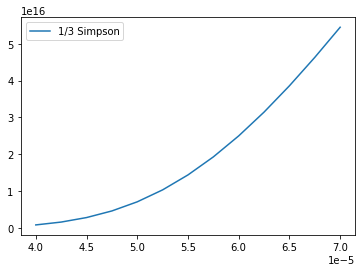

t 2400
erro 5.221073669067631e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 2.7164316263703188


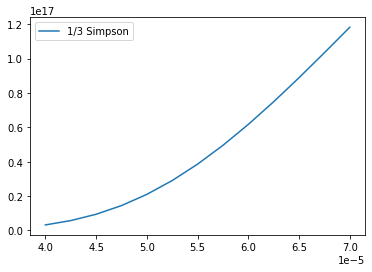

t 2600
erro 3.6140319810141886e-06 < 1e-05 n= 12
h: 2.5e-06
n:  12
Resultado: 4.228180896128135


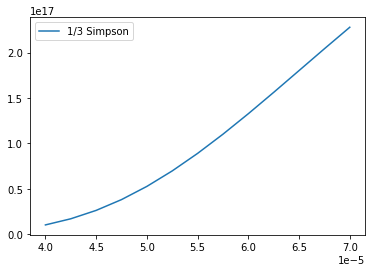

t 2800
erro 5.515971286569128e-06 < 1e-05 n= 10
h: 3.0000000000000005e-06
n:  10
Resultado: 6.091511913069425


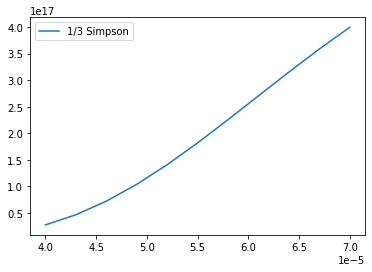

t 3000
erro 4.257799748832231e-06 < 1e-05 n= 8
h: 3.7500000000000005e-06
n:  8
Resultado: 8.255307765300651


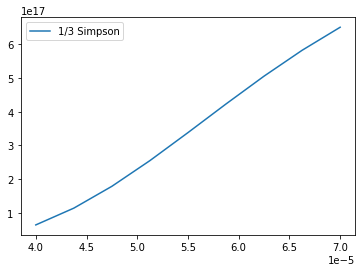

In [25]:
a= 4*10**-5
b= 7*10**-5
t= 2000

while t <=3000:
    print('t',t)
    
    n = calculaSubintervalosUmTercoSimpson(a,b,t)
    x,y,c,h = criaIntervalosUmTercoSimpson(a,b,n,t)
    Sresult = simpsonRepetida(x,c,y,a,b,n)
    Sresult = (64.77 * Sresult)/t**4   
    print('h:',h)
    print('n: ',n)
    print('Resultado:',Sresult)
    plt.plot(x,y,'-',label='1/3 Simpson')
    plt.legend()
    plt.show()
    t +=200

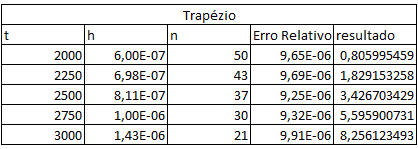

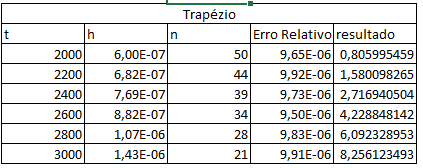

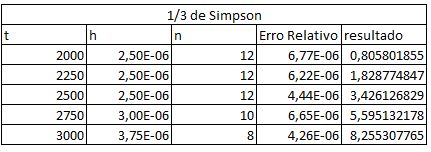

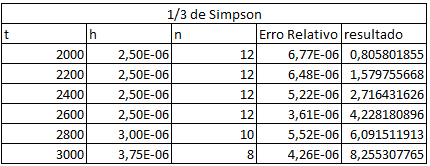

#### Análise dos Erros
##### Para o Trapézio
$
\text{Temos que}
\\
\large{\mathit{E_{TR} = - \frac{mh^3f^{''}(\xi)}{12} }}
\text{}
$
##### Para o 1/3 de Simpson
$
\text{Temos que}
\\
\large{\mathit{E_{SR} = - \frac{mh^5f^{(iv)}(\xi)}{180} }}
\\
\text{Como um terço de simpson fornece um resultado exato para }
\\
\text{um polinomio até de grau 3 seu erro acaba sendo menor.}
\\
\text{Logo seu passo será maior que a do trapézio pois ele }
\\
\text{obtém aproximações melhores}
$
#### Análise dos Resultados 
$
\text{Ambos os métodos trazem o mesmo resultado porém o trapézio}
\\
\text{ necessita te um maior número de subintervalos n }
$

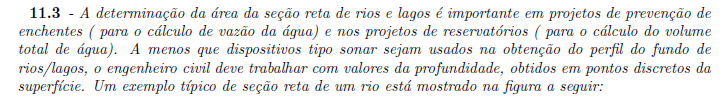
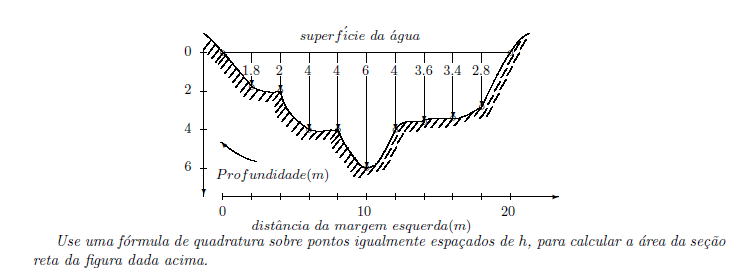

In [26]:
def passoH(a,b,m):
    x = []
    y= []
    _h = (b-a)/m
    x.append(a)
    y.append(f2(a))
    for i in range(1,m):
        a += _h
        x.append(a)
        y.append(f2(a))
    x.append(b)
    y.append(f2(b))
    return x,y

In [27]:
def trapezioRepitida2(x,a,b,m):
    h = (b-a)/m
    s = 0
    for i in range(1,m):
        s += f2(x[i])
    v = (h/2)*(f2(x[0]) + 2*s + f2(x[m]))
    return v

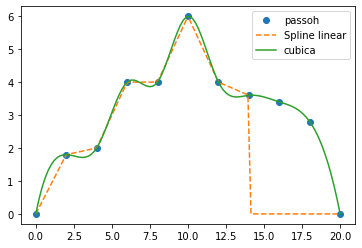

63.2


In [28]:
xx = np.linspace(0,20,100)
x_dado = [0,2,4,6,8,10,12,14,16,18,20]
y_dado = [0,1.8,2,4,4,6,4,3.6,3.4,2.8,0]
y_spline_linear = [splineLinear(x_dado,y_dado,_x,n) for _x in xx]
f2 = interp1d(x_dado, y_dado, kind='cubic')
a=0
b=20
n = 10
x,y = passoH(a,b,n)
plt.plot(x, y, 'o', xx, y_spline_linear,'--',xx,f2(xx),'-')
plt.legend(['passoh','Spline linear','cubica'])
plt.show()
tresult = trapezioRepitida2(x,a,b,n)
print(tresult)

In [29]:
def passoHSimpson(a,b,m):
    
    x = []
    y= []
    c= []
    _h = (b-a)/m
    x.append(a)
    y.append(f2(a))
    c.append(1)
    
    for i in range(1,m):
        a += _h
        x.append(a)
        y.append(f2(a))
        
        if i % 2 == 0:
            c.append(2)
        else:
            c.append(4)
        
    x.append(b)
    y.append(f2(b))
    c.append(1)
    return x,y,c

In [30]:
def simpsonRepetida(x,c,y,a,b,m):
    
    h = (b-a)/m
    s = 0
    
    for i in range(len(x)):
        s += c[i]*y[i]
    v = (h/3)*s
    return v

In [31]:
a=0
b=20
n=10
x,y,c = passoHSimpson(a,b,n)
Sresult = simpsonRepetida(x,c,y,a,b,n)
print('Resultado:',Sresult)
print(x)
print(y)
print(c)

Resultado: 66.4
[0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20]
[array(0.), array(1.8), array(2.), array(4.), array(4.), array(6.), array(4.), array(3.6), array(3.4), array(2.8), array(0.)]
[1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1]


$
\text{Como o passo é o mesmo um terço de simpson acaba}
\\
\text{gerando melhores resultados do que trapézio}
$